# Modelo celular autómata

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def animar_solucion(X, U, NT, T, title, doc_name, step=None):
    """
    Función para crear una animación y guardarla como gif.
    Utiliza la función FuncAnimation de matplotlib.
    
    X, U son listas que contienen arreglos a graficar. Deben tener el mismo tamaño.
    """
    # crea plot
    fig, ax = plt.subplots()
    ax.set_ylim(-0.1, 1.1)
    lines = []
    
    for i in range(len(U)):
        u = U[i]
        x = X[i]
        
        # genera un plot inicial para cada par de datos de entrada
        line, = ax.plot(x, u[0])
        lines += [line]

    # Parametros animacion
    niter = NT
    step = T
    
    if step is not None:
        step = step

    # Funcion para animar
    def animate(i, X, U):
        
        # Pasa por cada par de datos de entrada
        for j in range(len(U)):
            u = U[j]
            x = X[j]
            
            # Actualiza grafico
            lines[j].set_data(x, u[i])

        ax.set_title(title + " t={}".format(i))
        return ax

    # Animación
    ani = animation.FuncAnimation(fig, animate, frames=range(1,niter,step), interval=100, 
                                    fargs = (X, U), repeat=True)

    ani.save(doc_name)

In [3]:
class Car:
    def __init__(self, x_i, p):
        self.x = x_i
        self.v = 0
        self.empty_cells = 0
        self.p = p

    def set_empty_cells(self, x_next_car, N_x):
        
        diff = np.fabs(x_next_car - self.x)
        self.empty_cells = min( diff, N_x - diff )
    
    def set_v(self):
        self.v = np.random.randint(0, self.empty_cells+1)

    def update_v(self):
        self.v += 1

    def reduce_speed(self):
        self.v = min(self.empty_cells, self.v)
    
    def random_slow(self):
        u = np.random.uniform()
        if self.v >= 2 and u>=p:
            self.v -= 1
    
    def update_x(self, N_x):
        self.x = (self.x + self.v)%N_x

    def string(self):
        print("Posición: ", self.x)
        print("Velocidad: ", self.v)

In [4]:
# Obtiene carretera e indices con autos
def get_road_and_iscar(N_t, N_x, ps):
    road = np.zeros((N_t, N_x))
    road[0] = np.random.choice([0, 1], size=N_x, p=ps)

    is_car = np.nonzero(road[0])[0]
    return road, is_car

# Obtiene autos
def get_cars(is_car, p):
    cars = np.full(len(is_car), fill_value=None)


    for c in range(len(cars)):
        xi = is_car[c]
        car = Car(xi, p)

        road_without_car = road[0][xi+1:]

        if len(np.nonzero(road_without_car)[0]) != 0:
            car.empty_cells = np.nonzero(road_without_car)[0][0]

        car.set_v()

        cars[c] = car

    return cars

In [5]:
def move_cars(cars, road, pos, vel, t):

    for c in range(len(cars)-1, -1, -1):

        cars[c].update_v()
        cars[c].reduce_speed()
        cars[c].random_slow()
        cars[c].update_x(N_x)

        cars[c].set_empty_cells(cars[(c+1)%len(cars)].x, N_x)

        pos[t][c] = cars[c].x
        vel[t][c] = cars[c].v

In [6]:
def run_cars(N_x, N_t, road, cars, delta_t):
    pos = np.zeros((N_t, len(cars)))
    vel = np.zeros((N_t, len(cars)))


    for t in range(1, N_t, delta_t):
        move_cars(cars, road, pos, vel, t)

        pos = pos.astype(int)
        vel = vel.astype(int)

        np.put(road[t], pos[t], 1, "wrap")

    plt.imshow(road, cmap="binary")
    plt.show()

    return vel, pos

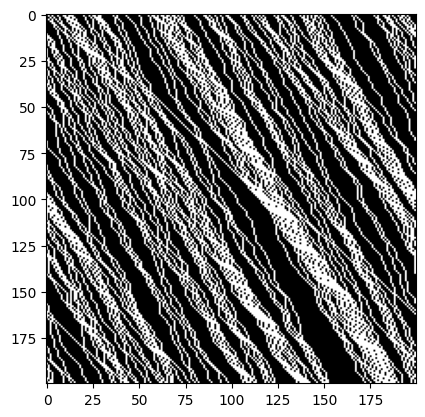

In [7]:
seed = 420
np.random.seed(seed)

T = 200
x_f = 200

N_x = 200
N_t = 200

delta_t = 1
delta_x = 1

N_t = int(T / delta_t)
N_x = int(x_f / delta_x)

p = 0.5
p_aparicion = 0.7
ps = [1-p_aparicion, p_aparicion]

# Crea carretera y autos
road, is_car = get_road_and_iscar(N_t, N_x, ps)
cars = get_cars(is_car, p)
vel, pos = run_cars(N_x, N_t, road, cars, delta_t)

In [8]:
for t in range(N_t):
    autos = road[t][road[t]==1]
    #print(len(autos))

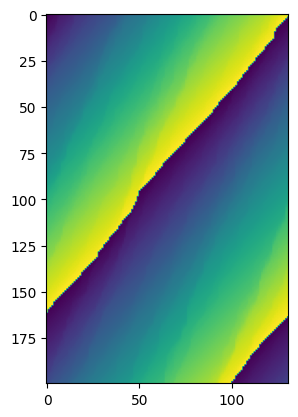

In [9]:
plt.imshow(pos)
plt.show()

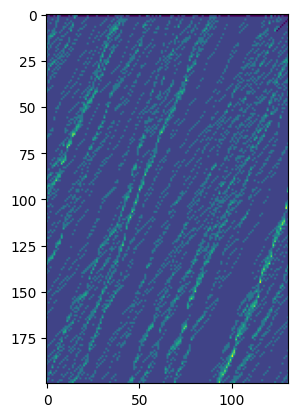

In [10]:
plt.imshow(vel)
plt.show()

In [11]:
# TODO: Autos entran a la carretera de manera random

In [12]:
def rho(x, pos):
    for i in range(len(pos)):
        x_i = pos[i]
        x_j = pos[(i + 1)%len(pos)]

        if x_i < x <= x_j:
            return 1/(x_j - x_i)
    return 0


def rho_2(x, h, pos):
    count = 0
    for i in range(len(pos)):
        x_i = pos[i]
        if x - h <= x_i <= x + h:
            count += 1

    return count / (2 * h)

In [13]:
h = 8
x_to_plot = np.linspace(0, N_x, N_x)
x_to_plot_2 = np.linspace(0, N_x, N_x)

rho_to_plot = np.zeros((N_t, N_x))
rho_to_plot_2 = np.zeros((N_t, N_x))

for t in range(1, N_t):
    for i in range(N_x):
        rho_to_plot[t][i] = rho(x_to_plot[i], pos[t])
        rho_to_plot_2[t][i] = rho_2(x_to_plot[i], h, pos[t])

MovieWriter ffmpeg unavailable; using Pillow instead.


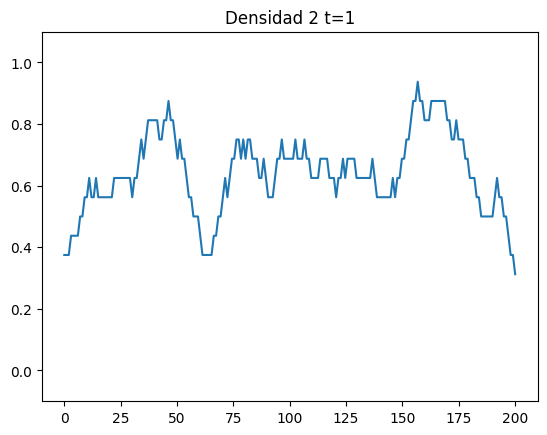

In [14]:
animar_solucion([x_to_plot], [rho_to_plot_2], N_t, delta_t, "Densidad 2", "densidad_2.gif", step=None)

MovieWriter ffmpeg unavailable; using Pillow instead.


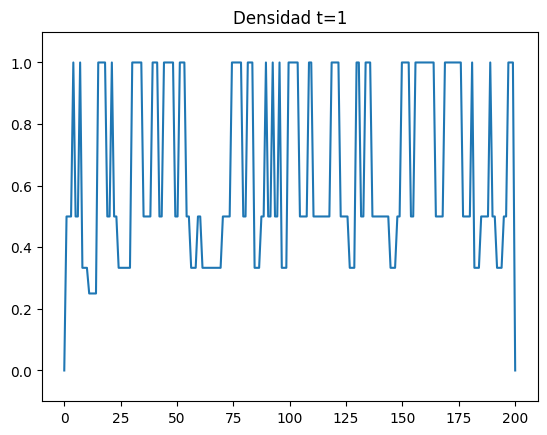

In [15]:
animar_solucion([x_to_plot], [rho_to_plot], N_t, delta_t, "Densidad", "densidad.gif", step=None)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed681c97-7ca4-4b35-b4f5-3ec87f20438e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>